# Final metrics

# Imports

In [44]:
import pandas as pd
from sklearn.metrics import classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from seaborn import heatmap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read files

In [40]:
files = '../data/results/results_v1.csv', '../data/results/results_v2.csv', '../data/results/results_v3.csv', '../data/results/results_v4.csv'
dfs = [pd.read_csv(file) for file in files]
dfs[0].head()

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,Background,Gun
1,I_CIDIMEC_Background_2.mp4,Background,Background
2,I_CIDIMEC_Background_3.mp4,Background,Gun
3,I_CIDIMEC_Background_4.mp4,Background,Gun
4,I_CIDIMEC_Gun_1.mp4,Gun,Gun


## Encode files

In [41]:
for df in dfs:
    df['true_class'] = LabelEncoder().fit_transform(df['true_class'])
    df['pred_class'] = LabelEncoder().fit_transform(df['pred_class'])
dfs[0].head()    

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,0,1
1,I_CIDIMEC_Background_2.mp4,0,0
2,I_CIDIMEC_Background_3.mp4,0,1
3,I_CIDIMEC_Background_4.mp4,0,1
4,I_CIDIMEC_Gun_1.mp4,1,1


In [51]:
# Classification reports
for i, df in enumerate(dfs):
    # print("-"*50+f" Model {i+1} "+"-"*50)
    # print(classification_report(df['true_class'], df['pred_class']))
    # print: accuracy, precision, recall, f1-score, auc
    print(round(accuracy_score(df['true_class'], df['pred_class']), 2), end=',')
    print(round(precision_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(recall_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(f1_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(roc_auc_score([1 if x > 0 else 0 for x in df['true_class']], df['pred_class']), 2))
    

0.62,0.73,0.56,0.56,0.69
0.7,0.74,0.71,0.69,0.83
0.72,0.73,0.71,0.7,0.78
0.38,0.57,0.4,0.35,0.5


## Confusion matrixes

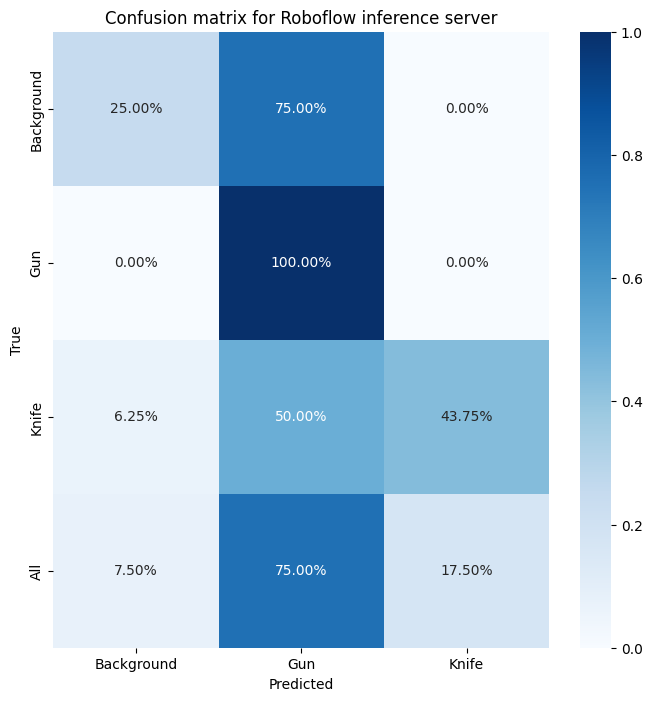

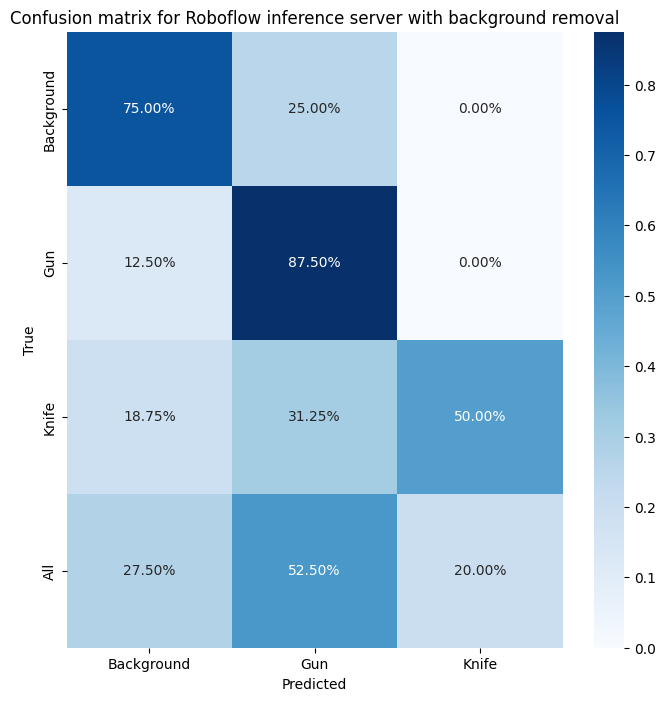

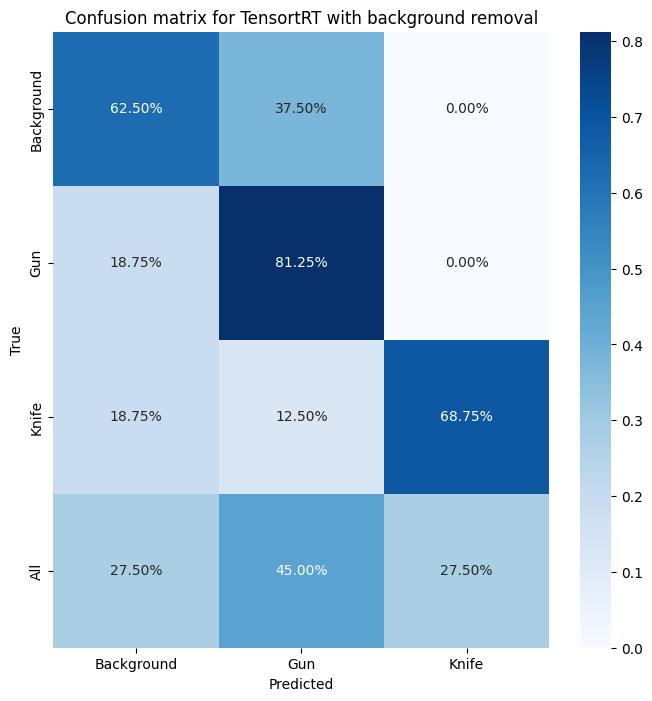

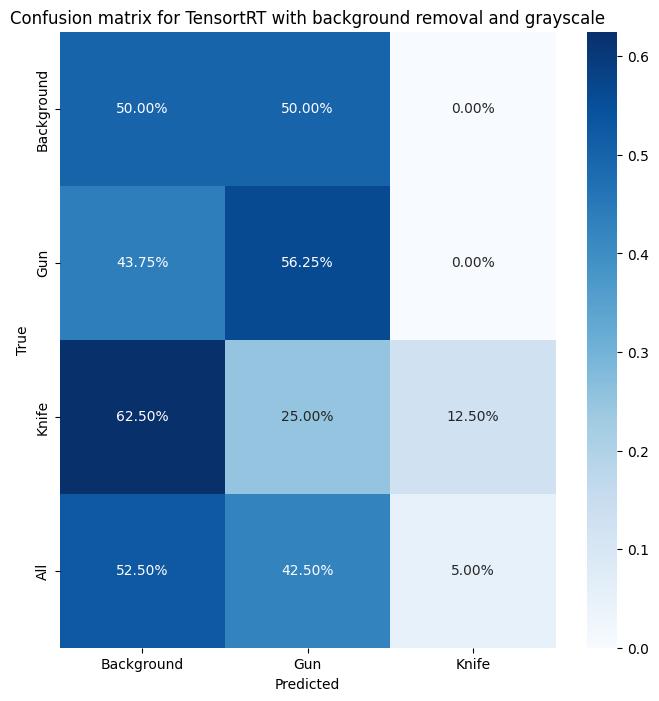

In [43]:
meanings = [
    "Roboflow inference server",
    "Roboflow inference server with background removal",
    "TensortRT with background removal",
    "TensortRT with background removal and grayscale"
]
for meaning, df in zip(meanings, dfs):
    confusion_matrix_percentage = pd.crosstab(df['true_class'], df['pred_class'], rownames=['True'], colnames=['Predicted'], margins=True, normalize='index')
    plt.figure(figsize=(8, 8))

    # Change axes by classnames: ['Background', 'Gun, 'Knife']
    confusion_matrix_percentage = confusion_matrix_percentage.rename(columns={0: 'Background', 1: 'Gun', 2: 'Knife', 3: 'All'})
    confusion_matrix_percentage = confusion_matrix_percentage.rename(index={0: 'Background', 1: 'Gun', 2: 'Knife', 3: 'All'})

    heatmap(confusion_matrix_percentage, annot=True, fmt='.2%', cmap='Blues')
    plt.title(f"Confusion matrix for {meaning}")